In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando los datos
temperature_df = pd.read_csv('./celsius_a_fahrenheit.csv')
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

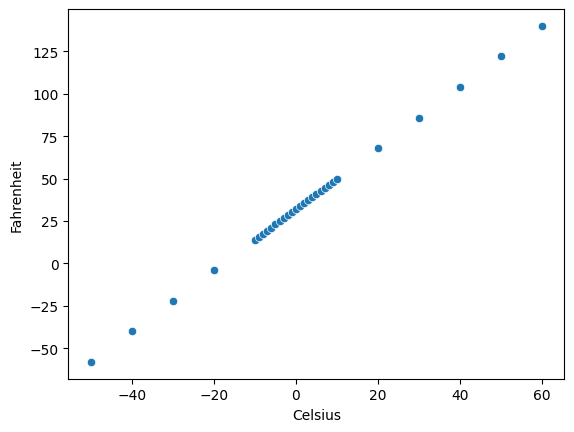

In [3]:
# Visualización
sns.scatterplot(x = temperature_df['Celsius'], y = temperature_df['Fahrenheit'])

In [4]:
# Cargando el set de datos
X_train = temperature_df['Celsius']
Y_train = temperature_df['Fahrenheit']

In [5]:
# Creando el modelo
model = tf.keras.Sequential()

#model.add(tf.keras.layers.Input(shape=(1,)))
#model.add(tf.keras.layers.Dense(units=1))

model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

#model.summary()

/home/zombits/MACHINE_LEARNING/PRACTICAS/my_env/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compilado
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5), loss='mean_squared_error')

# Entrenando el modelo
epochs_hist = model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 4873.5371
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3567.2734
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2525.4182
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1747.2174
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1223.3490
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 932.0916
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 836.0432
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 881.8149
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1005.5939
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1144.7013
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1250.3405
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1295.0524
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1272.4602
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1191.8569
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

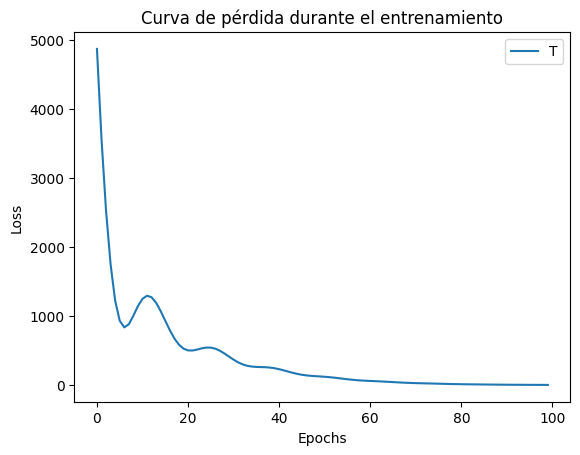

In [10]:
# Evaluación del modelo para ver como fué entrenando y conocer la curva de entrenamiento
epochs_hist.history.keys()

# Gráfico
plt.plot(epochs_hist.history['loss'])
plt.title('Curva de pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('Training Loss')
plt.show()

In [11]:
# Ahora vamos a tomar los pesos de nuestro modelo
model.get_weights()

# Predicciones
Temp_C = np.array([[0]])
Temp_F = model.predict([Temp_C])
print(Temp_F)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[30.722807]]


In [12]:
# Usando la formula de conversión para ver si nuestro modelo hizo bién la predicción
Temp_F = 9/5 * Temp_C + 32
print(Temp_F)

[[32.]]
